<a href="https://colab.research.google.com/github/annaluizacaraciolo/DeepLearning2023/blob/main/Projeto_DangerousFarmInsects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
from sklearn.model_selection import train_test_split
from google.colab import files

# Importando dataset

In [ ]:
! pip install -q kaggle
files.upload()

In [10]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets download tarundalal/dangerous-insects-dataset

 99% 443M/447M [00:03<00:00, 147MB/s]
100% 447M/447M [00:03<00:00, 136MB/s]


In [12]:
!unzip /content/dangerous-insects-dataset

Archive:  /content/dangerous-insects-dataset.zip
  inflating: farm_insects/Africanized Honey Bees (Killer Bees)/Image_1.jpg  
  inflating: farm_insects/Africanized Honey Bees (Killer Bees)/Image_10.jpg  
  inflating: farm_insects/Africanized Honey Bees (Killer Bees)/Image_100.jpg  
  inflating: farm_insects/Africanized Honey Bees (Killer Bees)/Image_102.jpg  
  inflating: farm_insects/Africanized Honey Bees (Killer Bees)/Image_104.jpg  
  inflating: farm_insects/Africanized Honey Bees (Killer Bees)/Image_105.jpg  
  inflating: farm_insects/Africanized Honey Bees (Killer Bees)/Image_106.jpg  
  inflating: farm_insects/Africanized Honey Bees (Killer Bees)/Image_107.png  
  inflating: farm_insects/Africanized Honey Bees (Killer Bees)/Image_108.jpg  
  inflating: farm_insects/Africanized Honey Bees (Killer Bees)/Image_11.jpg  
  inflating: farm_insects/Africanized Honey Bees (Killer Bees)/Image_110.jpg  
  inflating: farm_insects/Africanized Honey Bees (Killer Bees)/Image_116.jpg  
  infla

# Armazenando o dataset

In [13]:
import pathlib
data = tf.keras.utils.image_dataset_from_directory("farm_insects", labels="inferred")
data_dir = pathlib.Path("farm_insects")

Found 1591 files belonging to 15 classes.


In [14]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1591 files belonging to 15 classes.
Using 1273 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1591 files belonging to 15 classes.
Using 318 files for validation.


A opção abaixo otimiza o treinamento ao deixar em memória os dados que forem utilizados na primeira epoch.
https://www.tensorflow.org/tutorials/images/classification?hl=pt-br#configure_the_dataset_for_performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Análise exploratória de dados

## Conhecendo o conjunto de dados

In [ ]:
num_classes = len(data.class_names)
print("Number of classes:", num_classes)

Number of classes: 15


In [ ]:
for species in data.class_names:
  class_name = species
  image_count = len(os.listdir('farm_insects/' + class_name))
  print(f"Class '{class_name}' has {image_count} images.")

Class 'Africanized Honey Bees (Killer Bees)' has 97 images.
Class 'Aphids' has 88 images.
Class 'Armyworms' has 96 images.
Class 'Brown Marmorated Stink Bugs' has 114 images.
Class 'Cabbage Loopers' has 104 images.
Class 'Citrus Canker' has 104 images.
Class 'Colorado Potato Beetles' has 112 images.
Class 'Corn Borers' has 115 images.
Class 'Corn Earworms' has 110 images.
Class 'Fall Armyworms' has 113 images.
Class 'Fruit Flies' has 101 images.
Class 'Spider Mites' has 119 images.
Class 'Thrips' has 109 images.
Class 'Tomato Hornworms' has 109 images.
Class 'Western Corn Rootworms' has 100 images.


A partir da análise de quantiade de imagens presentes nas amostras de cada classe, percebemos que o conjunto de dados trabalhado é bem distribuído.

## Visualizando o conjunto de dados

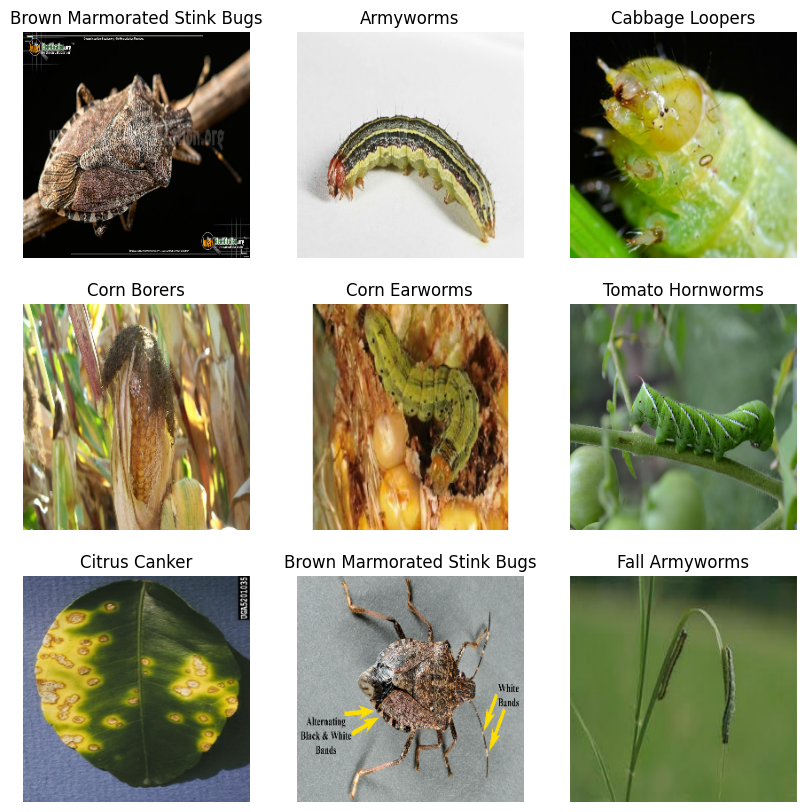

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(data.class_names[labels[i]])
        plt.axis("off")
plt.show()


OU FAZER DESSA FORMA

In [ ]:
from tensorflow.keras.preprocessing import image

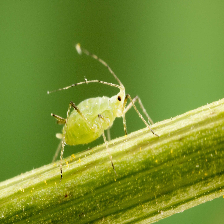

In [ ]:
img_path = 'farm_insects/Aphids/Image_1.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
display(img)


## Dimensão das imagens

In [ ]:
import tensorflow as tf
import pathlib

data_dir = pathlib.Path("farm_insects")
data = tf.keras.utils.image_dataset_from_directory(data_dir, labels="inferred", image_size=(224, 224))

# Get image dimensions
image_shapes = set()
for images, _ in data:
    for image in images:
        image_shapes.add(image.shape)

print("Different image shapes found in the dataset:")
print(image_shapes)

# Check if images have consistent dimensions
if len(image_shapes) == 1:
    print("All images have consistent dimensions.")
    image_height, image_width, num_channels = image_shapes.pop()
else:
    print("Images have varying dimensions.")
    # Decide on a common size for resizing, e.g., (height, width)
    common_image_size = (224, 224)  # You can change this to your preferred size
    image_height, image_width, num_channels = common_image_size


Found 1591 files belonging to 15 classes.
Different image shapes found in the dataset:
{TensorShape([224, 224, 3])}
All images have consistent dimensions.


# Treinamento
- Fazer o treinamento de uma rede VGG pré treinada no ImageNet
- Fazer o treinamento de uma rede VGG com o dataset Dangerous Farm Insects
- Fazer o treinamento de uma DenseNet pré treinada (tentar transfer learning)
- Fazer o treinamento de uma MobileNet (pois é econômica de recursos)

### VGG - Transfer learning

Aplicando o passo a passo da documentação do Keras [Transfer learning & fine-tuning](https://keras.io/guides/transfer_learning/#the-typical-transferlearning-workflow)

In [19]:
base_model = keras.applications.VGG16(
    input_shape=(256, 256, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [20]:
base_model.trainable = False

In [21]:
inputs = keras.Input(shape=(256, 256, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [23]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
model.fit(data, epochs=10)

Epoch 1/10
50/50 [==============================] - 24s 390ms/step - loss: -184.9175 - binary_accuracy: 0.0572
Epoch 2/10
50/50 [==============================] - 18s 300ms/step - loss: -554.2573 - binary_accuracy: 0.0553
Epoch 3/10
50/50 [==============================] - 21s 318ms/step - loss: -922.6266 - binary_accuracy: 0.0553
Epoch 4/10
50/50 [==============================] - 19s 313ms/step - loss: -1292.0779 - binary_accuracy: 0.0553
Epoch 5/10
50/50 [==============================] - 18s 306ms/step - loss: -1661.5176 - binary_accuracy: 0.0553
Epoch 6/10
50/50 [==============================] - 19s 325ms/step - loss: -2030.7216 - binary_accuracy: 0.0553
Epoch 7/10
50/50 [==============================] - 18s 304ms/step - loss: -2400.3101 - binary_accuracy: 0.0553
Epoch 8/10
50/50 [==============================] - 20s 308ms/step - loss: -2769.6694 - binary_accuracy: 0.0553
Epoch 9/10
50/50 [==============================] - 18s 304ms/step - loss: -3139.6035 - binary_accuracy: 0.

### DenseNet

In [ ]:
tf.keras.applications.DenseNet121(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling="max",
    classes=15,
    classifier_activation="softmax",
).summary()